<a href="https://colab.research.google.com/github/ValeriaYashan/analisis_datos/blob/main/PREVISION_GASTOS_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# Lista de fechas festivas en para los años 2022 y 2023
fechas_festivas = [
    # Fechas festivas de ejemplo, reemplazar con las fechas reales correspondientes
    '2022-11-03', '2022-11-05', '2022-11-10', '2022-11-28', '2022-12-08', '2022-12-25',
    '2023-11-03', '2023-11-05', '2023-11-10', '2023-11-28', '2023-12-08', '2023-12-25',
]


In [3]:
# Conversión de las fechas festivas a formato datetime
fechas_festivas = pd.to_datetime(fechas_festivas)

In [4]:
# Datos ficticios de gastos para cada mes de los años 2022 y 2023
datos_historicos = {
    'fecha': pd.date_range(start='2022-01-01', periods=24, freq='MS'),
    # Gastos reales para 2022 y 2023
    'monto': [
        450.50, 200.75, 700.80, 300.65, 500.30, 400.40, 850.90, 600.55, 450.25,
        700.60, 300.95, 500.20,  # 2022
        470.45, 210.50, 680.70, 320.35, 510.85, 410.95, 870.15, 610.40, 470.55,
        720.25, 310.45, 520.10   # 2023
    ]
}

In [5]:
# Convertir esto en un DataFrame de pandas
df_historico = pd.DataFrame(datos_historicos)

In [6]:
# Añadir columnas de tiempo como características
df_historico['mes'] = df_historico['fecha'].dt.month
df_historico['dia_semana'] = df_historico['fecha'].dt.dayofweek

In [7]:
# Marcar fechas festivas y fines de semana largos como 1, días no festivos como 0
df_historico['festivo'] = df_historico['fecha'].isin(fechas_festivas).astype(int)

In [8]:
# Preparar características y etiquetas para el modelo de machine learning
X = df_historico[['mes', 'dia_semana', 'festivo']]
y = df_historico['monto']

In [9]:
# Dividir los datos en un conjunto de entrenamiento y otro de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Entrenar el modelo de Random Forest
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
# Crear un nuevo DataFrame para las fechas futuras de 2024, incluyendo la característica de festivos
fechas_futuras = pd.date_range(start='2024-01-01', periods=12, freq='MS')
# Asumimos inicialmente que no hay festivos; necesitarás actualizar esto con los festivos reales de 2024
festivos_2024 = [0]*12
X_future = pd.DataFrame({
    'mes': fechas_futuras.month,
    'dia_semana': fechas_futuras.dayofweek,
    'festivo': festivos_2024
})

In [12]:
# Predecir gastos para el año 2024
predicciones = modelo.predict(X_future)


In [13]:
# Mostrar las predicciones
print("Gastos Anticipados para 2024:")
for fecha, pred in zip(fechas_futuras, predicciones):
    print(f"Fecha: {fecha.date()}, Gasto anticipado: ${pred:.2f}")

Gastos Anticipados para 2024:
Fecha: 2024-01-01, Gasto anticipado: $341.90
Fecha: 2024-02-01, Gasto anticipado: $280.03
Fecha: 2024-03-01, Gasto anticipado: $538.48
Fecha: 2024-04-01, Gasto anticipado: $483.36
Fecha: 2024-05-01, Gasto anticipado: $427.87
Fecha: 2024-06-01, Gasto anticipado: $417.72
Fecha: 2024-07-01, Gasto anticipado: $670.38
Fecha: 2024-08-01, Gasto anticipado: $577.71
Fecha: 2024-09-01, Gasto anticipado: $617.53
Fecha: 2024-10-01, Gasto anticipado: $536.79
Fecha: 2024-11-01, Gasto anticipado: $445.90
Fecha: 2024-12-01, Gasto anticipado: $518.21


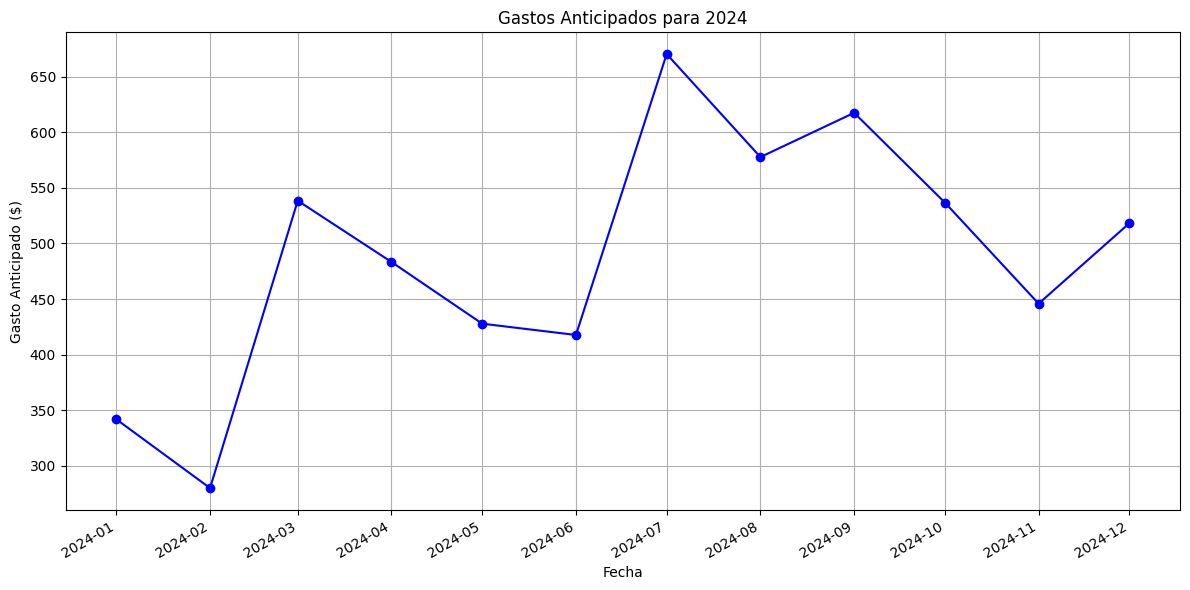

In [15]:
# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(fechas_futuras, predicciones, marker='o', linestyle='-', color='blue')
# Formatear el gráfico
plt.title('Gastos Anticipados para 2024')
plt.xlabel('Fecha')
plt.ylabel('Gasto Anticipado ($)')

# Formatear las fechas en el eje x para mostrar solo año y mes
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotar las fechas para mejor lectura
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.tight_layout()
plt.show()